In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]
sns.set_style("darkgrid")

# Numerical Setup

In [272]:
n=100
m = 1000 # Number of measurements 
k = 10 # Number of non-zero  coefficents 
T = 50 # Number of time-steps
suppX= np.random.choice(n, k, replace=False) # s locations chosen uniformly at random
A = np.random.normal(0, 1, (m, n)) # measurement matrix
xSparse = np.zeros((n, T))
xSparse[suppX,:] = xSparse[suppX,:] = np.random.normal(0, 1, (k,T))
b = A.dot(xSparse)
max_iter = 10*k

# MMV Sparse Randomized Kaczmarz 

In [237]:
# Sparse Randomized kaczmarz algorithm for MMV

# Solve linear system Ax = b

# Inputs: 
#    A: mxn matrix
#    b: mxT vector
#    xSparse: nxT sparse solution to system
#    k: estimate of sparsity of x (setting k = n gives RK)
#    suppX: support of xSparse
#    max_iter: maximum number of iterations
# Outputs:
#    x: estimate of solution
#    err: l2 error
#    supp_rec: percentage of recovered support

# ref. "A Fast Randomized Kaczmarz Algorithm for Sparse Solutions of Consistent Linear Systems"; Mansour, Yilmaz
# Add Anna and Rachel paper

def mmvsrk(A, xSparse, b, k, suppX, max_iter):
    # Initialize     
    m,n = A.shape
    _,T = b.shape 
    fnorm = np.linalg.norm(A, 'fro')**2
    rnorm = np.linalg.norm(A, axis=1)**2
    rowProbs = rnorm/fnorm
    
    X = np.zeros((n,T))
    ktrue = len(suppX)
    supp_rec = []
    err = []
    
    for iter in np.arange(max_iter):
        # Update estimate of support
        supp = np.argsort(np.linalg.norm(X, axis=1)**2, kind='mergesort')[-k:] #take the k greatest 
        
        # weights
        w = (1/np.sqrt(iter+1)) * np.ones(n)
        w[supp] = 1
        
        # choose row
        i = np.random.choice(np.arange(m), p=rowProbs)
        weighted_Ai = w*A[i,:] # weighted row i of A (element-wise product)
        
        # update x
        for tt in np.arange(T):
            dx = ((b[i,tt] - weighted_Ai.dot(X[:,tt]))/np.linalg.norm(weighted_Ai)**2)*weighted_Ai
            X[:,tt] += dx

        # compute metrics
        err +=  [np.linalg.norm(X - xSparse, 'fro')**2/np.linalg.norm(xSparse, 'fro')**2]
        supp_rec += [len(set(suppX).intersection(set(supp)))/float(ktrue)]    

    return X, err, supp_rec

In [238]:
X, err, supp_rec = mmvsrk(A, xSparse, b, int(2*k), suppX, max_iter)

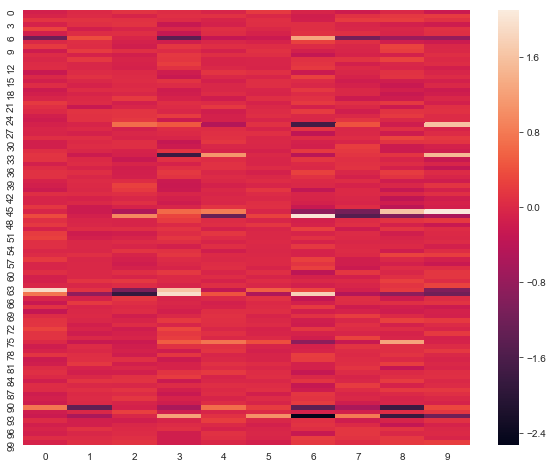

In [239]:
sns.heatmap(X)

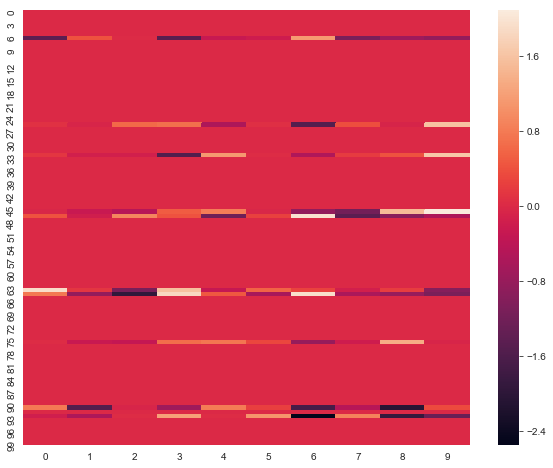

In [240]:
sns.heatmap(xSparse)

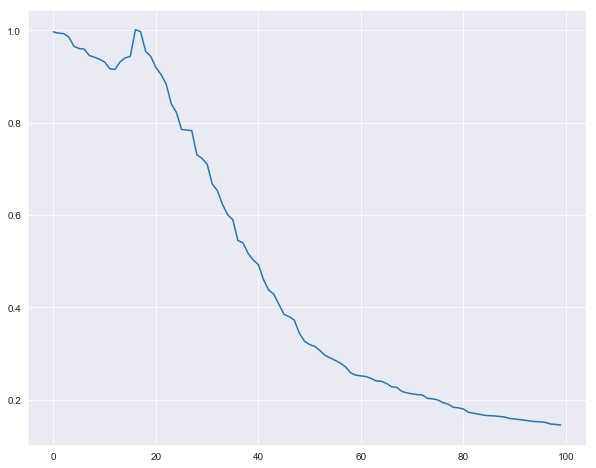

In [241]:
plt.plot(err)

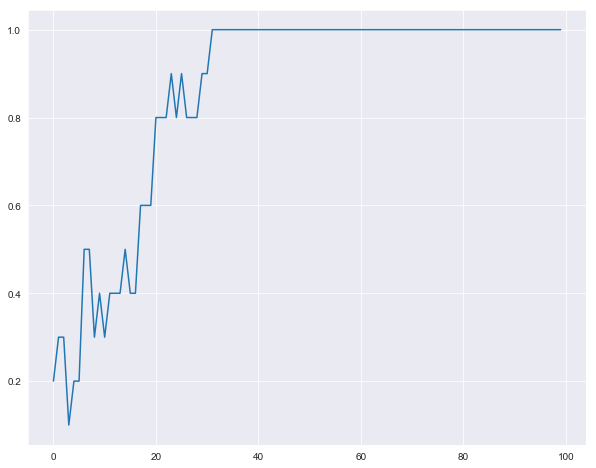

In [242]:
plt.plot(supp_rec)

## Prior Information MMV SRK (Option 2)

In [ ]:
# Sparse Randomized kaczmarz algorithm for MMV

# Solve linear system Ax = b

# Inputs: 
#    A: mxn matrix
#    b: mxT vector
#    xSparse: nxT sparse solution to system
#    k: estimate of sparsity of x (setting k = n gives RK)
#    suppX: support of xSparse
#    max_iter: maximum number of iterations
# Outputs:
#    x: estimate of solution
#    err: l2 error
#    supp_rec: percentage of recovered support

# ref. "A Fast Randomized Kaczmarz Algorithm for Sparse Solutions of Consistent Linear Systems"; Mansour, Yilmaz
# Add Anna and Rachel paper

def mmvsrk_pi(A, xSparse, b, k, suppX, max_iter):
    # Initialize     
    m,n = A.shape
    _,T = b.shape 
    fnorm = np.linalg.norm(A, 'fro')**2
    rnorm = np.linalg.norm(A, axis=1)**2
    rowProbs = rnorm/fnorm
    
    suppEst = []
    numEsts = length(suppEsts);
    alphaTot = 0;
    for j=1:numEsts
        suppEst = union(suppEst, suppEsts{j});
        alphaTot = alphaTot + alphas(j)*length(suppEsts{j});
    end
    alphaTot = alphaTot/length(suppEst);
    fracCorrect = length(intersect(suppX,suppEst)) / length(suppEst);
    
    X = np.zeros((n,T))
    ktrue = len(suppX)
    supp_rec = []
    err = []
    
    for iter in np.arange(max_iter):
        # Update estimate of support
        supp = np.argsort(np.linalg.norm(X, axis=1)**2, kind='mergesort')[-k:] #take the k greatest 
        
        # weights
        w = (1/np.sqrt(iter+1)) * np.ones(n)
        w[supp] = 1
        
        # choose row
        i = np.random.choice(np.arange(m), p=rowProbs)
        weighted_Ai = w*A[i,:] # weighted row i of A (element-wise product)
        
        # update x
        for tt in np.arange(T):
            dx = ((b[i,tt] - weighted_Ai.dot(X[:,tt]))/np.linalg.norm(weighted_Ai)**2)*weighted_Ai
            X[:,tt] += dx

        # compute metrics
        err +=  [np.linalg.norm(X - xSparse, 'fro')**2/np.linalg.norm(xSparse, 'fro')**2]
        supp_rec += [len(set(suppX).intersection(set(supp)))/float(ktrue)]    

    return X, err, supp_rec

# Online SRK

In [80]:
# %   Online Sparse Randomized kaczmarz algorithm for MMV
# %   
# %   Solve linear system Ax = b
# %   
# %   Inputs: 
# %       A: mxn matrix
# %       b: mxT vector
# %       xSparse: nxT sparse solution to system
# %       k: estimate of sparsity of x (setting k = n gives RK)
# %       suppX: support of xSparse
# %       maxIter: maximum number of iterations
# %   Outputs:
# %       x: estimate of solution
# %       err: l2 error
# %       suppRec: percentage of recovered support
# %
# % ref. "A Fast Randomized Kaczmarz Algorithm for Sparse Solutions of Consistent Linear Systems"; Mansour, Yilmaz
def online_mmvsrkv(A, xSparse, b, k, suppX, maxIter):
    # Initialize     
    m,n = A.shape
    _,T = b.shape 
    fnorm = np.linalg.norm(A, 'fro')**2
    rnorm = np.linalg.norm(A, axis=1)**2
    rowProbs = rnorm/fnorm
    
    X = np.zeros((n,T))
    ktrue = len(suppX)
    supp_rec = []
    err = []
    
    bins = np.zeros((n,1))
    supp = range(k)
    suppJS = range(k)
    iterIndx = np.zeros((T,1))
    
    I = 100 # Should change to the random technique eventually
    
    # Now time-steps are the outer loop
    for t in range(T):
        
        # Fixed number of SRK iterations
        for i in range(I):
            # weights
            w = (1/np.sqrt(i+1)) * np.ones(n)
            w[supp] = 1
            
            row = np.random.choice(np.arange(m), p=rowProbs)
            weighted_row = w*A[row,:] # weighted row of A (element-wise product)

            dx = ((b[row,t] - weighted_row.dot(X[:,t]))/np.linalg.norm(weighted_row)**2)*weighted_row
            X[:,t] += dx
            
            # update estimate of support
            supp = np.argsort(np.abs(X[:,t]), kind='mergesort')[-k:] #take the k greatest 
        
        bins[supp] += I/float(maxIter)
        suppJS = np.argsort(np.abs(bins[:,0]), kind='mergsort')[-k:]
        iterIndx[t] = I

        err +=  [np.linalg.norm(X - xSparse, 'fro')**2/np.linalg.norm(xSparse, 'fro')**2]
        supp_rec += [len(set(suppX).intersection(set(suppJS)))/float(ktrue)] 
    return X, err, supp_rec, iterIndx

In [85]:
X, err, supp_rec, iterIndx = online_mmvsrkv(A, xSparse, b, 2*k, suppX, 1000)

In [88]:
supp_rec

[0.5, 0.8, 0.8, 0.9, 0.9, 0.9, 0.9, 0.9, 1.0, 1.0]

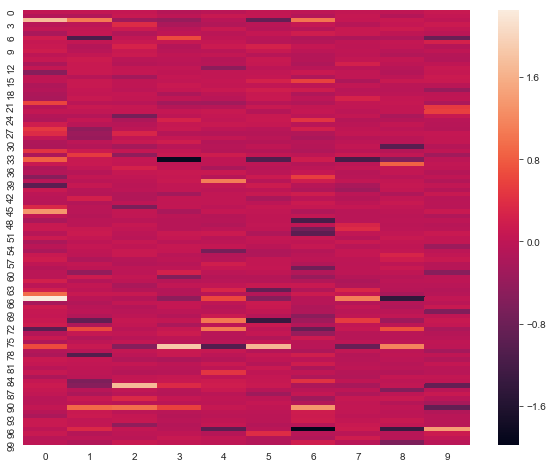

In [87]:
sns.heatmap(X)

# Online MMV-SRK
Here we attempt sequential recovery of simaltaneously sparse vectors (while also explointing the temporal correlation to improve the estimation accuracy of the signal). 

- Reduce Computational Complexity and Memory Requirements
- Exploit structure in the signal beyond simaltaneous sparsity 

We will begin without factoring in temporal correlation and then go from there.

In [246]:
# %   Online Sparse Randomized kaczmarz algorithm for MMV
# %   
# %   Solve linear system Ax = b
# %   
# %   Inputs: 
# %       A: mxn matrix
# %       b: mxT vector
# %       xSparse: nxT sparse solution to system
# %       k: estimate of sparsity of x (setting k = n gives RK)
# %       suppX: support of xSparse
# %       maxIter: maximum number of iterations
# %   Outputs:
# %       x: estimate of solution
# %       err: l2 error
# %       suppRec: percentage of recovered support
# %
# % ref. "A Fast Randomized Kaczmarz Algorithm for Sparse Solutions of Consistent Linear Systems"; Mansour, Yilmaz
def online_mmvsrkv(A, xSparse, b, k, suppX, max_iter = None):
    # Initialize     
    m,n = A.shape
    _,T = b.shape 
    fnorm = np.linalg.norm(A, 'fro')**2
    rnorm = np.linalg.norm(A, axis=1)**2
    rowProbs = rnorm/fnorm
    
    X = np.zeros((n,T))
    ktrue = len(suppX)
    supp_rec = []
    err = []
    
    # Time-steps are the outer loop
    for t in range(T):
        # Update estimate of support
        supp = np.argsort(np.linalg.norm(X, axis=1)**2, kind='mergesort')[-k:] #take the k greatest
        
        # weights
        w = (1/np.sqrt(t+1)) * np.ones(n)
        w[supp] = 1

        row = np.random.choice(np.arange(m), p=rowProbs)
        weighted_row = w*A[row,:] # weighted row of A (element-wise product)
        
        # Time-steps we have so far
        # This can be done in parallel and is not inherently sequential
        # should be converted to matrix algebra instead of a for loop
        for tt in range(t+1):
            
            dx = ((b[row,tt] - weighted_row.dot(X[:,tt]))/np.linalg.norm(weighted_row)**2)*weighted_row
            X[:,tt] += dx

        err +=  [np.linalg.norm(X - xSparse, 'fro')**2/np.linalg.norm(xSparse, 'fro')**2]
        supp_rec += [len(set(suppX).intersection(set(supp)))/float(ktrue)] 
    return X, err, supp_rec

In [247]:
X, err, supp_rec = online_mmvsrkv(A, xSparse, b, 2*k, suppX)

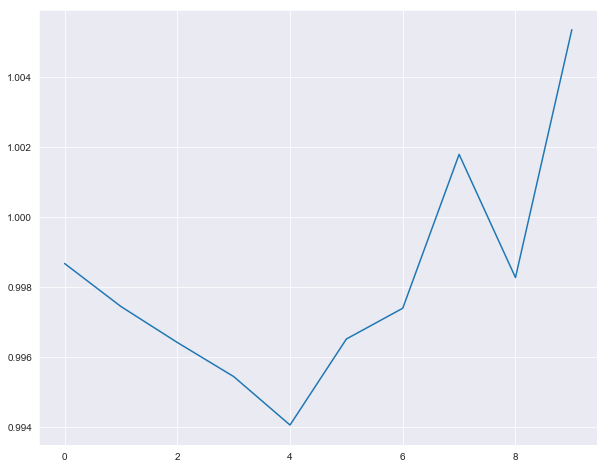

In [251]:
plt.plot(err)

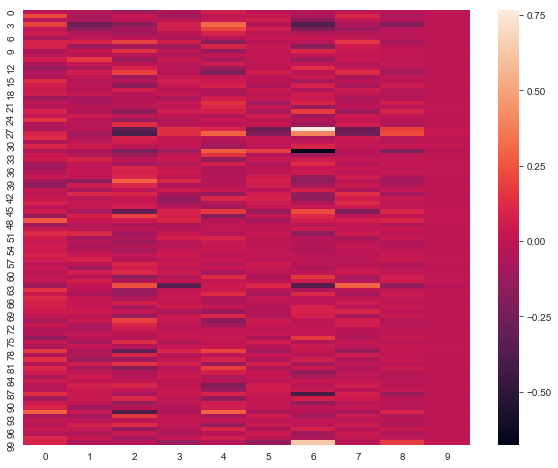

In [248]:
sns.heatmap(X)

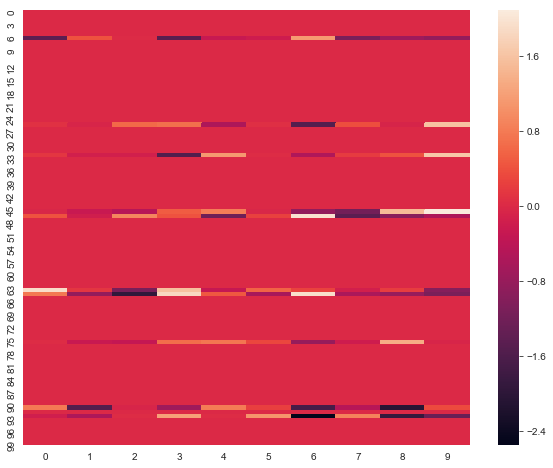

In [249]:
sns.heatmap(xSparse)

##  Modify Online MMV-SRK to Use Iterations

In [313]:
def online_mmvsrkv_iterate(A, xSparse, b, k, suppX, num_iter = 1):
    # Initialize     
    m,n = A.shape
    _,T = b.shape 
    fnorm = np.linalg.norm(A, 'fro')**2
    rnorm = np.linalg.norm(A, axis=1)**2
    rowProbs = rnorm/fnorm
    
    X = np.zeros((n,T))
    ktrue = len(suppX)
    supp_rec = []
    err = []
    
    # Time-steps are the outer loop
    for t in range(T):
        for i in range(num_iter): 
            # Update estimate of support
            supp = np.argsort(np.linalg.norm(X, axis=1)**2, kind='mergesort')[-k:] #take the k greatest

            # weights
            # Check this weight...too fast? 
            w = (1/np.sqrt((i+1)*(t+1))) * np.ones(n)
            w[supp] = 1

            row = np.random.choice(np.arange(m), p=rowProbs)
            weighted_row = w*A[row,:] # weighted row of A (element-wise product)

            # Time-steps we have so far
            # This can be done in parallel and is not inherently sequential
            # should be converted to matrix algebra instead of a for loop
            for tt in range(t+1):

                dx = ((b[row,tt] - weighted_row.dot(X[:,tt]))/np.linalg.norm(weighted_row)**2)*weighted_row
                X[:,tt] += dx

        err +=  [np.linalg.norm(X - xSparse, 'fro')**2/np.linalg.norm(xSparse, 'fro')**2]
        supp_rec += [len(set(suppX).intersection(set(supp)))/float(ktrue)] 
    return X, err, supp_rec

In [314]:
X, err, supp_rec = online_mmvsrkv_iterate(A, xSparse, b, 2*k, suppX, 5)

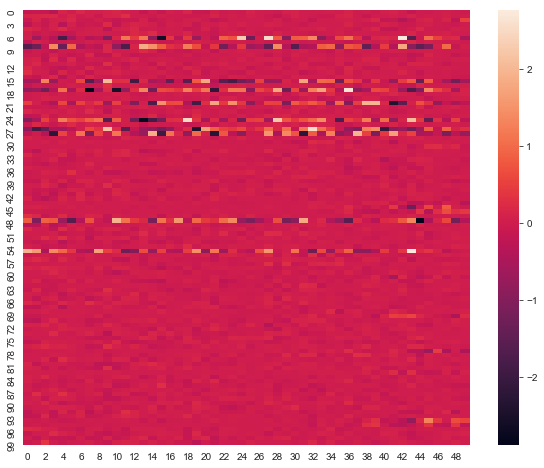

In [315]:
sns.heatmap(X)

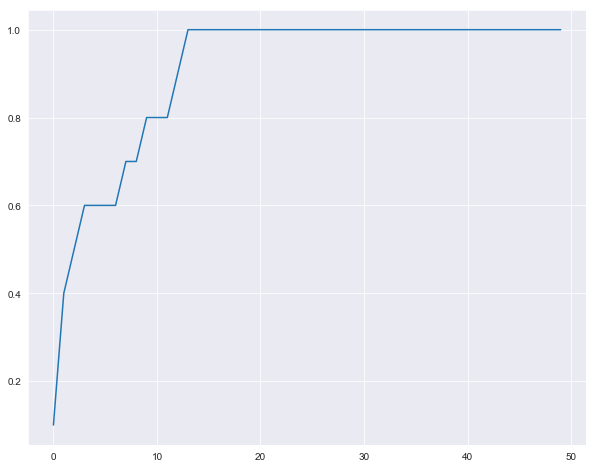

In [316]:
plt.plot(supp_rec)

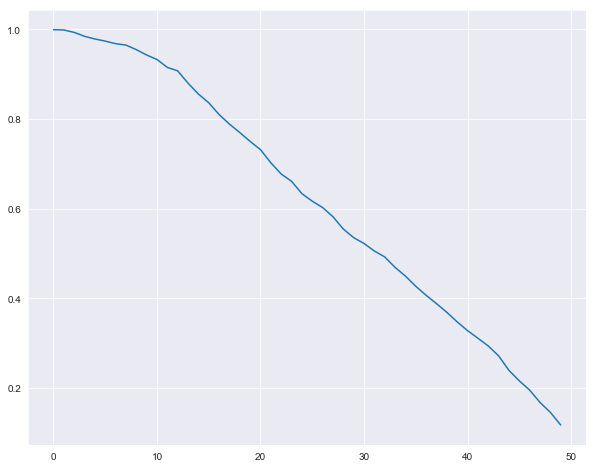

In [317]:
plt.plot(err)

## Iterate, but don't update past time-steps

In [260]:
def online_mmvsrkv_no_delay(A, xSparse, b, k, suppX, num_iter = 1):
    # Initialize     
    m,n = A.shape
    _,T = b.shape 
    fnorm = np.linalg.norm(A, 'fro')**2
    rnorm = np.linalg.norm(A, axis=1)**2
    rowProbs = rnorm/fnorm
    
    X = np.zeros((n,T))
    ktrue = len(suppX)
    supp_rec = []
    err = []
    
    # Time-steps are the outer loop
    for t in range(T):
        for i in range(num_iter): 
            # Update estimate of support
            supp = np.argsort(np.linalg.norm(X, axis=1)**2, kind='mergesort')[-k:] #take the k greatest

            # weights
            # Check this weight...too fast? 
            w = (1/np.sqrt((i+1)*(t+1))) * np.ones(n)
            w[supp] = 1

            row = np.random.choice(np.arange(m), p=rowProbs)
            weighted_row = w*A[row,:] # weighted row of A (element-wise product)

            dx = ((b[row,t] - weighted_row.dot(X[:,t]))/np.linalg.norm(weighted_row)**2)*weighted_row
            X[:,t] += dx

        err +=  [np.linalg.norm(X - xSparse, 'fro')**2/np.linalg.norm(xSparse, 'fro')**2]
        supp_rec += [len(set(suppX).intersection(set(supp)))/float(ktrue)] 
    return X, err, supp_rec

In [263]:
X, err, supp_rec = online_mmvsrkv_no_delay(A, xSparse, b, 2*k, suppX, 40)

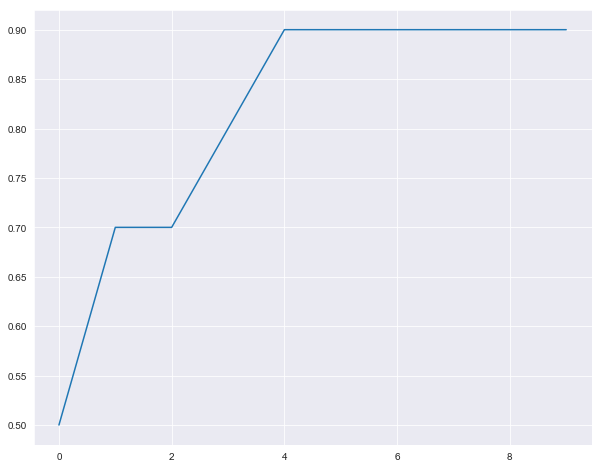

In [267]:
plt.plot(supp_rec)

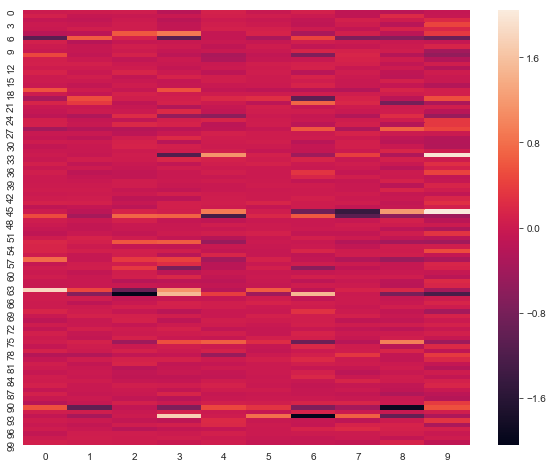

In [265]:
sns.heatmap(X)

In [266]:
err

[0.9532944395067405,
 0.9310427985921538,
 0.8856700711277423,
 0.7943359506494755,
 0.7602110558666646,
 0.7434266502378388,
 0.6104846844425003,
 0.5632018278473077,
 0.4582208284602106,
 0.38551710738684714]

## Allow updates in a fixed window

In [273]:
def online_mmvsrkv_window(A, xSparse, b, k, suppX, num_iter = 1):
    # Initialize     
    m,n = A.shape
    _,T = b.shape 
    fnorm = np.linalg.norm(A, 'fro')**2
    rnorm = np.linalg.norm(A, axis=1)**2
    rowProbs = rnorm/fnorm
    
    X = np.zeros((n,T))
    ktrue = len(suppX)
    supp_rec = []
    err = []
    
    # Time-steps are the outer loop
    for t in range(T):
        for i in range(num_iter): 
            # Update estimate of support
            supp = np.argsort(np.linalg.norm(X, axis=1)**2, kind='mergesort')[-k:] #take the k greatest

            # weights
            # Check this weight...too fast? 
            w = (1/np.sqrt((i+1)*(t+1))) * np.ones(n)
            w[supp] = 1

            row = np.random.choice(np.arange(m), p=rowProbs)
            weighted_row = w*A[row,:] # weighted row of A (element-wise product)

            # Time-steps in a fixed look-back window representing the time delay in sequential recovery
            # This can be done in parallel and is not inherently sequential
            # should be converted to matrix algebra instead of a for loop
            for tt in np.arange(max(0, t-5), t+1, 1):
                dx = ((b[row,tt] - weighted_row.dot(X[:,tt]))/np.linalg.norm(weighted_row)**2)*weighted_row
                X[:,tt] += dx

        err +=  [np.linalg.norm(X - xSparse, 'fro')**2/np.linalg.norm(xSparse, 'fro')**2]
        supp_rec += [len(set(suppX).intersection(set(supp)))/float(ktrue)] 
    return X, err, supp_rec

In [278]:
X, err, supp_rec = online_mmvsrkv_window(A, xSparse, b, 2*k, suppX, 10)

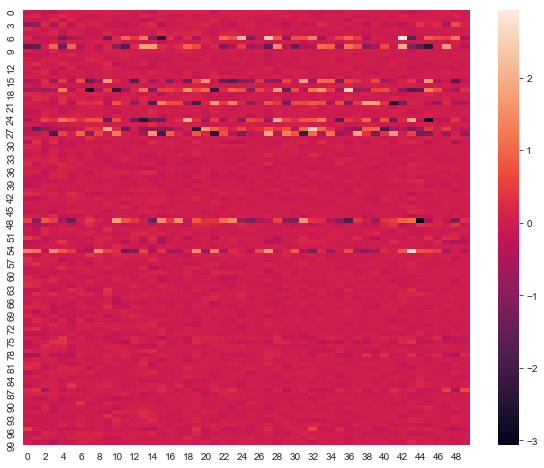

In [279]:
sns.heatmap(X)

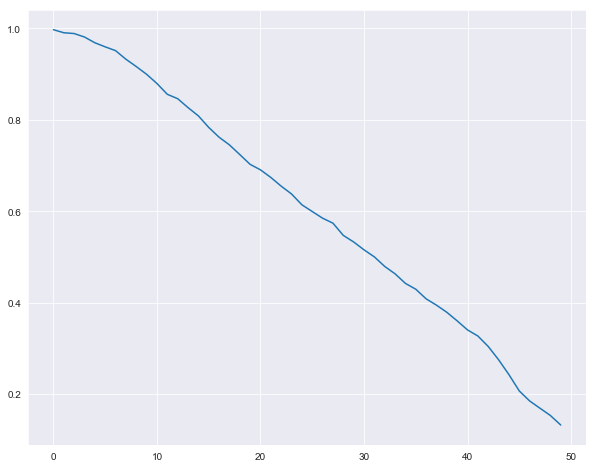

In [280]:
plt.plot(err)

In [281]:
supp_rec

[0.3,
 0.6,
 0.6,
 0.6,
 0.7,
 0.7,
 0.8,
 0.9,
 0.9,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

## Initialize Signal with Previous time-step
The hope here is that fewer iterations will be required at each time-step to move recovery along

In [305]:
def online_mmvsrkv_initialize(A, xSparse, b, k, suppX, num_iter = 1):
    # Initialize     
    m,n = A.shape
    _,T = b.shape 
    fnorm = np.linalg.norm(A, 'fro')**2
    rnorm = np.linalg.norm(A, axis=1)**2
    rowProbs = rnorm/fnorm
    
    X = np.zeros((n,T))
    ktrue = len(suppX)
    supp_rec = []
    err = []
    
    # Time-steps are the outer loop
    for t in range(T):
        for i in range(num_iter): 
            # Update estimate of support
            supp = np.argsort(np.linalg.norm(X, axis=1)**2, kind='mergesort')[-k:] #take the k greatest

            # weights
            # Check this weight...too fast? 
            w = (1/np.sqrt((i+1)*(t+1))) * np.ones(n)
            w[supp] = 1

            row = np.random.choice(np.arange(m), p=rowProbs)
            weighted_row = w*A[row,:] # weighted row of A (element-wise product)

            # Time-steps we have so far
            # This can be done in parallel and is not inherently sequential
            # should be converted to matrix algebra instead of a for loop
            for tt in range(t+1):
                dx = ((b[row,tt] - weighted_row.dot(X[:,tt]))/np.linalg.norm(weighted_row)**2)*weighted_row
                X[:,tt] += dx
        
        # Change the initial estimate of the next signal from zero to the estimate fof the current signal
        X[:, min(t+1, T-1)] = X[:, t]
        
        err +=  [np.linalg.norm(X - xSparse, 'fro')**2/np.linalg.norm(xSparse, 'fro')**2]
        supp_rec += [len(set(suppX).intersection(set(supp)))/float(ktrue)] 
    return X, err, supp_rec

In [310]:
X, err, supp_rec = online_mmvsrkv_initialize(A, xSparse, b, 2*k, suppX, 5)

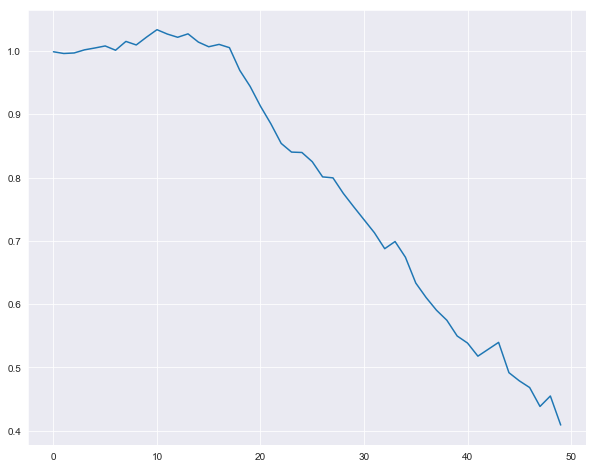

In [311]:
plt.plot(err)

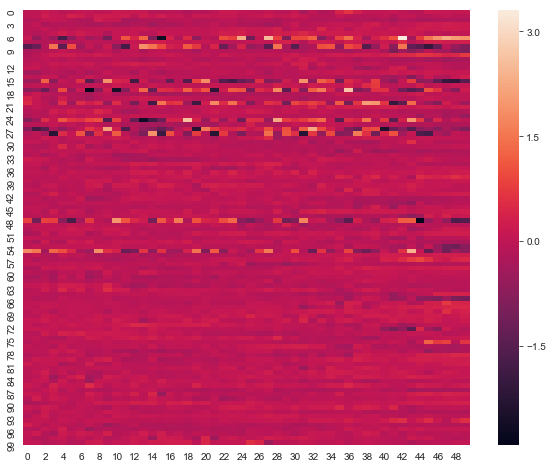

In [312]:
sns.heatmap(X)

## Initialize Signal with random entries instead of zeros at the estimated support? 